In [5]:
import pandas as pd # Import pandas library
import numpy as np # Import numpy library
import matplotlib.pyplot as plt # Import matplotlib plotting
import seaborn as sns # Import seaborn for visualization

In [6]:
df = pd.read_csv('data.csv') # Load the dataset
df.head() # Display first few rows

df['Diagnosis'] = np.where(df['Diagnosis'] == 'M', 1, 0)
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [7]:
df.info() # Checking for data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

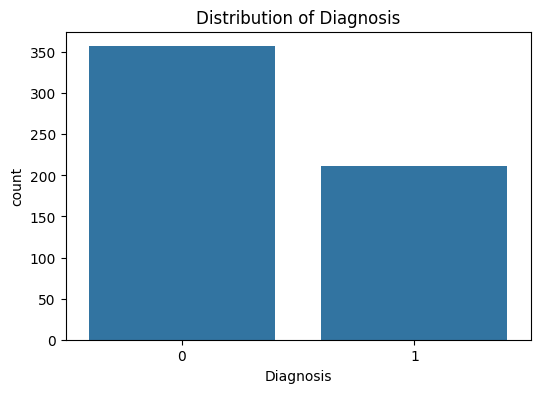

In [8]:
plt.figure(figsize=(6, 4)) 
sns.countplot(x='Diagnosis', data=df) # Create bar plot of diagnosis counts
plt.title('Distribution of Diagnosis')
plt.show()

# 1 means cancer and 0 means no cancer

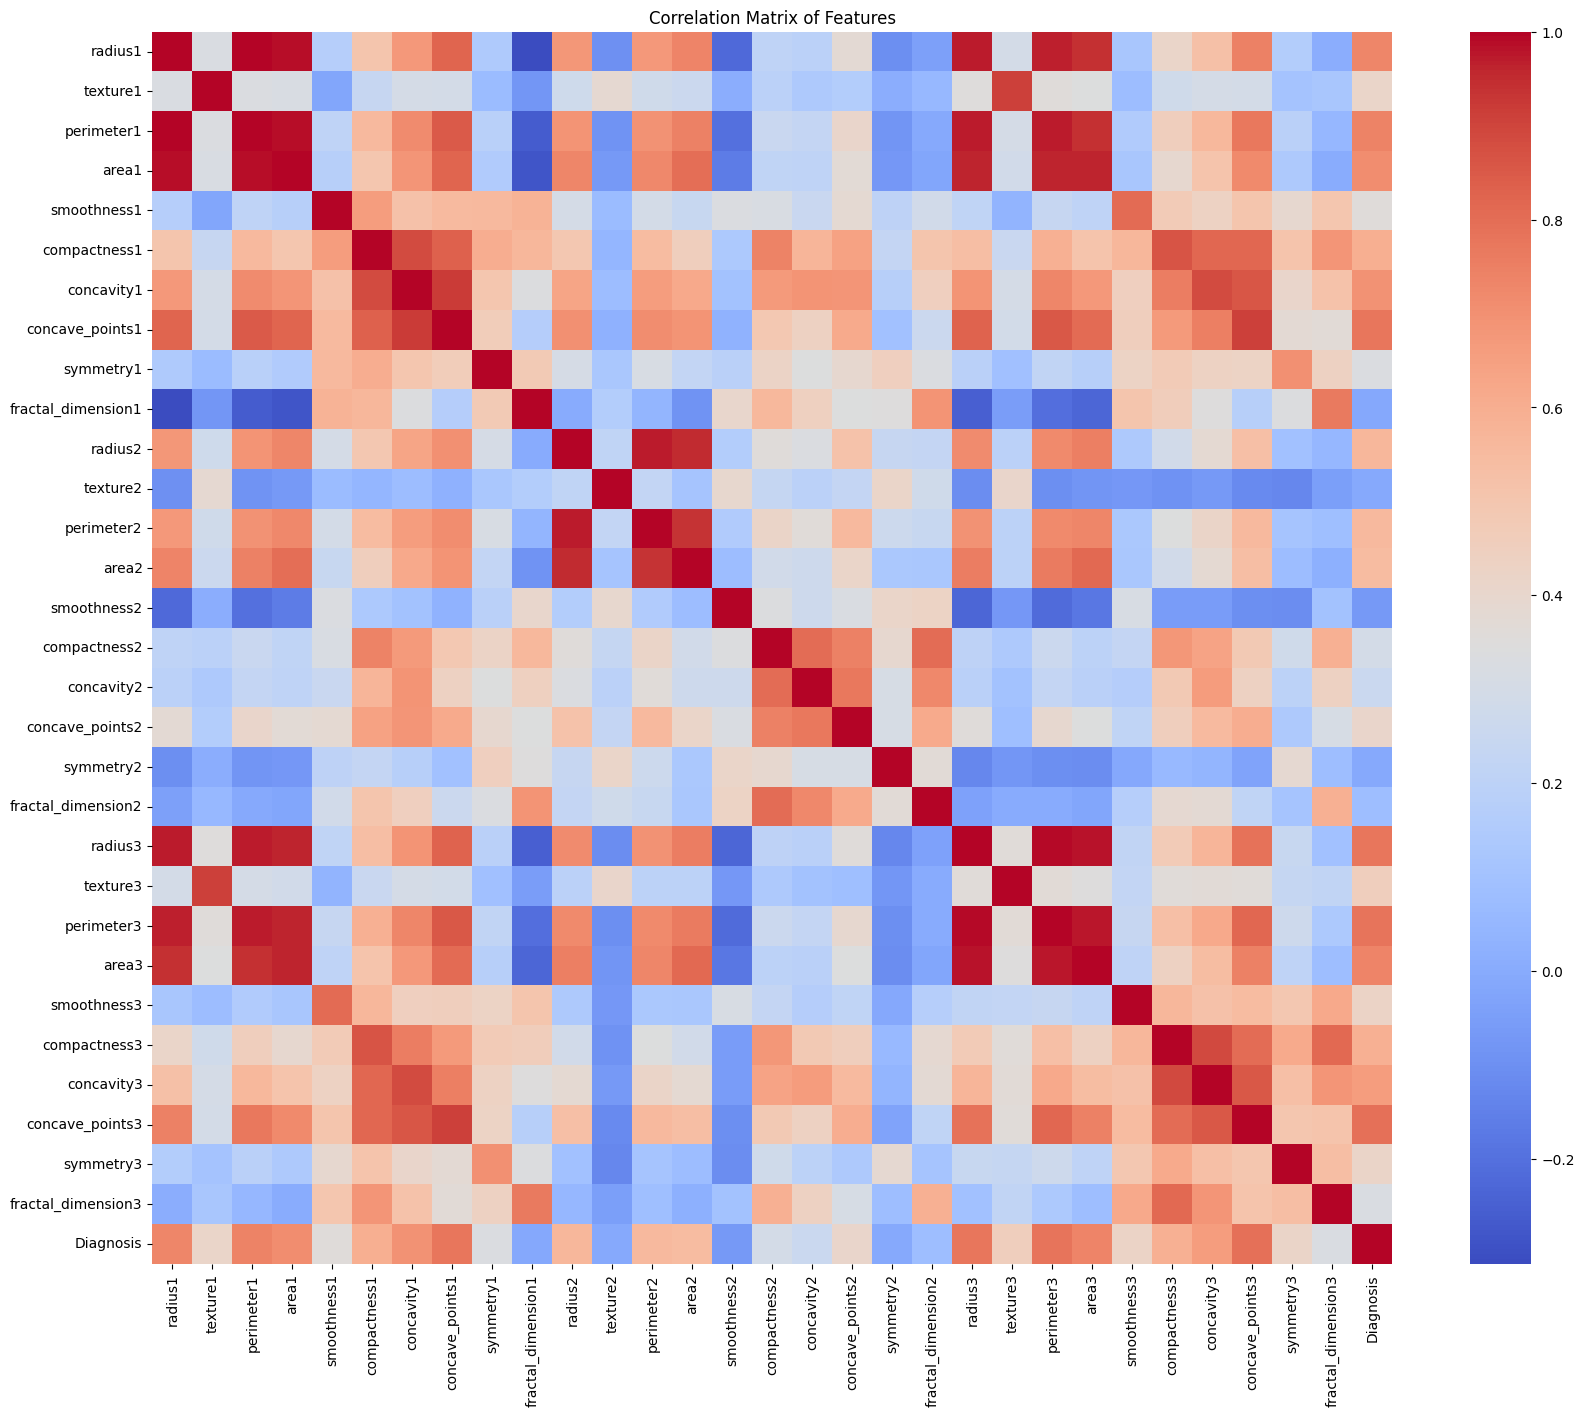

In [9]:
# This is only place where I am using pre-existing library to see if this dataset even makes sense. There needs to be a correlation among 

plt.figure(figsize=(20, 16))
correlation_matrix = df.corr() # Calculate correlation between all features
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [10]:
X = df.drop(['Diagnosis'], axis=1).values # Extracting features as numpy array
y = df['Diagnosis'].values # Extracting target as numpy array

In [11]:
# Splitting data into train and test sets
np.random.seed(42) # Setting random seed for reproducibility
indices = np.random.permutation(len(X)) # Creating random indices
split_point = int(len(X) * 0.8) # 80% for training
train_indices = indices[:split_point]
test_indices = indices[split_point:]
X_train, X_test = X[train_indices], X[test_indices] # Splitting features
y_train, y_test = y[train_indices], y[test_indices] # Splitting target    

In [12]:
# Feature scaling
def standardize(X_train, X_test):
    mean = np.mean(X_train, axis=0) # Calculate mean of each feature
    std = np.std(X_train, axis=0) # Calculate standard deviation
    # Handle zero standard deviation
    std[std == 0] = 1 
    X_train_scaled = (X_train - mean) / std # Scaling training data
    X_test_scaled = (X_test - mean) / std # Scaling test data using train parameters
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = standardize(X_train, X_test) # Scaling data

In [13]:
class LogisticRegression:
    # Initializing model parameters like learning rate and number of iterations
    def __init__(self, learning_rate=0.01, num_iterations=1000): # Initializing model parameters
        self.learning_rate = learning_rate # Learning rate in gradient descent
        self.num_iterations = num_iterations # Number of iterations for gradient descent
        self.weights = None # Weights (coefficients) for each feature 
        self.bias = None  # Bias term (intercept)

    def sigmoid(self, z): # Sigmoid activation function
        return 1 / (1 + np.exp(-np.clip(z, -500, 500))) # Clip to avoid overflow
    
    def fit(self, X, y): # Training model
        num_samples, num_features = X.shape # Extracting number of samples (rows) and features (columns)
        
        # Initializing weights with zeros and bias with zero
        self.weights = np.zeros(num_features) # Shape: (num_features,)
        self.bias = 0  # Scalar value
        
        # Performing gradient descent for the specified number of iterations
        for _ in range(self.num_iterations): 
            # Compute linear combination of features and weights (z)
            z = np.dot(X, self.weights) + self.bias # Shape: (num_samples,)

            # Applying the sigmoid function to get predicted probabilities
            y_pred = self.sigmoid(z)  
            
            # Compute gradients for weights and bias
            dw = (1/num_samples) * np.dot(X.T, (y_pred - y))  # Gradient of loss w.r.t weights
            db = (1/num_samples) * np.sum(y_pred - y)    # Gradient of loss w.r.t bias
            
            # Updating weights and bias using gradient descent step
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict_proba(self, X): # Predicting probabilities for each sample in X
        z = np.dot(X, self.weights) + self.bias # Compute z using learned parameters
        return self.sigmoid(z) # Return probabilities between 0 and 1
    
    def predict(self, X, threshold=0.5): # Predicting class labels
        probabilities = self.predict_proba(X) # Get predicted probabilities
        return (probabilities >= threshold).astype(int) # Converting probabilities to binary labels

In [14]:
# Training logistic regression model
log_reg = LogisticRegression(learning_rate=0.1, num_iterations=10000) # Creating model instance
log_reg.fit(X_train_scaled, y_train) # Trainining model

In [15]:
# Evaluating logistic regression model
y_pred_log = log_reg.predict(X_test_scaled) # Make predictions

# Calculating metrics
log_accuracy = np.mean(y_pred_log == y_test) # Accuracy
log_cm = np.zeros((2, 2)) # Confusion matrix
for i in range(len(y_test)):
    log_cm[y_test[i]][y_pred_log[i]] += 1

# Calculating precision, recall, F1
if log_cm[1][1] + log_cm[0][1] > 0:
    log_precision = log_cm[1][1] / (log_cm[1][1] + log_cm[0][1]) # Precision
else:
    log_precision = 0

if log_cm[1][1] + log_cm[1][0] > 0:
    log_recall = log_cm[1][1] / (log_cm[1][1] + log_cm[1][0]) # Recall
else:
    log_recall = 0

if log_precision + log_recall > 0:
    log_f1 = 2 * log_precision * log_recall / (log_precision + log_recall) # F1 score
else:
    log_f1 = 0

print(f"Logistic Regression Performance:")
print(f"Accuracy: {log_accuracy:.4f}")
print(f"Precision: {log_precision:.4f}")
print(f"Recall: {log_recall:.4f}")
print(f"F1 Score: {log_f1:.4f}")

Logistic Regression Performance:
Accuracy: 0.9474
Precision: 0.9556
Recall: 0.9149
F1 Score: 0.9348


In [17]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2): # Initializing decision tree parameters
        self.max_depth = max_depth # Maximum depth of the tree (None means unlimited depth)
        self.min_samples_split = min_samples_split # Minimum number of samples required to split a node
        self.tree = None # Placeholder for the tree structure
        
    def _entropy(self, y): # Calculating entropy for information gain
        classes, counts = np.unique(y, return_counts=True) # Finding unique class labels and their counts
        proportions = counts / len(y)  # Computing proportions of each class
        entropy = -np.sum([p * np.log2(p) for p in proportions if p > 0])  # Computing entropy formula
        return entropy # Returning entropy value
        
    def _information_gain(self, X, y, feature_idx, threshold): # Calculating information gain for split
        # Splitting data 
        left_indices = X[:, feature_idx] <= threshold # Identifying samples going to the left split
        right_indices = ~left_indices # Identifying samples going to the right split
        
        # If either split is empty, return 0 (invalid split)
        if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
            return 0
        
        # Computing the entropy of the entire dataset (parent entropy)
        n = len(y) # Total number of samples
        n_left, n_right = np.sum(left_indices), np.sum(right_indices) # Number of samples in left & right splits
        
        entropy_parent = self._entropy(y)  # Computing parent entropy 
        entropy_left = self._entropy(y[left_indices]) # Computing left split entropy
        entropy_right = self._entropy(y[right_indices]) # Computing right split entropy
        
        # Computing information gain as the reduction in entropy after the split
        information_gain = entropy_parent - (n_left/n * entropy_left + n_right/n * entropy_right)
        return information_gain # Returning computed information gain
    
    def _best_split(self, X, y): # Find the best feature and threshold for splitting
        num_samples, num_features = X.shape # Getting dataset dimensions
        
        if num_samples <= self.min_samples_split: # Stop if the number of samples is too small
            return None, None
            
        best_gain = -1 # Initialize best information gain
        best_feature = None # Placeholder for the best feature index
        best_threshold = None # Placeholder for the best threshold
        
        # Loop over all features
        for feature_idx in range(num_features):
            thresholds = np.unique(X[:, feature_idx])  # Get unique values in the feature
            
            # Loop over all unique threshold values
            for threshold in thresholds:
                information_gain = self._information_gain(X, y, feature_idx, threshold) # Computing info gain
                
                # If this is the best gain so far, update best parameters
                if information_gain > best_gain: 
                    best_gain = information_gain
                    best_feature = feature_idx
                    best_threshold = threshold
                    
        return best_feature, best_threshold # Returning best feature and threshold found
    
    def _build_tree(self, X, y, depth=0): # Recursively build the tree
        num_samples, num_features = X.shape # Get dataset size
        classes = np.unique(y) # Get unique class labels
        
        # Check stopping conditions
        if (self.max_depth is not None and depth >= self.max_depth) or \
           num_samples <= self.min_samples_split or \
           len(classes) == 1:     # Stop if max depth is reached, too few samples, or only one class
            counts = np.bincount(y.astype(int)) # Count occurrences of each class
            leaf_value = np.argmax(counts) # Assign the most frequent class as leaf value
            return {'leaf_value': leaf_value} # Return a leaf node
            
        # Find best split
        best_feature, best_threshold = self._best_split(X, y) 
        
        # If no valid split found, return a leaf node
        if best_feature is None:
            counts = np.bincount(y.astype(int))
            leaf_value = np.argmax(counts)
            return {'leaf_value': leaf_value}
            
        # Split data
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices
        
        # Recursively build left and right subtrees
        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return {
            'feature_idx': best_feature,
            'threshold': best_threshold,
            'left': left_subtree,
            'right': right_subtree
        }
    
    def fit(self, X, y): # Train the decision tree
        self.tree = self._build_tree(X, y)
            
    def _predict_sample(self, x, tree): # Predict for one sample
        if 'leaf_value' in tree: # If we reach a leaf node, return its value
            return tree['leaf_value']
            
        # Traverse the tree based on feature values
        if x[tree['feature_idx']] <= tree['threshold']:
            return self._predict_sample(x, tree['left'])  # If feature value is below threshold, go left
        else: # Otherwise, go right
            return self._predict_sample(x, tree['right'])
    
    def predict(self, X): # Predict for multiple samples
        return np.array([self._predict_sample(x, self.tree) for x in X])

In [18]:
class RandomForest:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, random_state=None): # Initialize random forest parameters
        self.n_estimators = n_estimators # Number of decision trees in the forest
        self.max_depth = max_depth  # Maximum depth allowed for each decision tree
        self.min_samples_split = min_samples_split # Minimum samples required for a node split
        self.random_state = random_state # Random seed for reproducibility
        self.trees = [] # List to store all decision trees in the forest
        
    def _bootstrap_sample(self, X, y): # Create a bootstrap sample
        n_samples = X.shape[0] # Number of samples in the dataset
        indices = np.random.choice(n_samples, size=n_samples, replace=True) # Randomly sample indices with replacement
        return X[indices], y[indices]  # Return the bootstrap sample (X and y)
        
    def fit(self, X, y): # Train the random forest
        if self.random_state is not None: 
            np.random.seed(self.random_state)  # Set random seed for reproducibility
        self.trees = [] # Clear any existing trees
        
        for _ in range(self.n_estimators): # Train n_estimators number of trees
            # Create bootstrap sample
            X_sample, y_sample = self._bootstrap_sample(X, y)
            
            # Create and train decision tree
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            
            # Add tree to forest
            self.trees.append(tree)
    
    def predict(self, X): # Predict using the random forest
        # Get predictions from all trees
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        
        # Return majority vote
        predictions = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):  # Loop through each sample
            values, counts = np.unique(tree_predictions[:, i], return_counts=True) # Count occurrences of each class
            predictions[i] = values[np.argmax(counts)] # Select the class with the highest count
            
        return predictions # Return the final predictions

In [19]:
# Train Random Forest model
rf = RandomForest(n_estimators=10, max_depth=5, min_samples_split=2, random_state=42)
rf.fit(X_train_scaled, y_train) # Train model

In [20]:
# Evaluate Random Forest model
y_pred_rf = rf.predict(X_test_scaled) # Make predictions

# Calculate metrics
rf_accuracy = np.mean(y_pred_rf == y_test) # Accuracy
rf_cm = np.zeros((2, 2)) # Confusion matrix
for i in range(len(y_test)):
    rf_cm[y_test[i]][y_pred_rf[i]] += 1

# Calculate precision, recall, F1
if rf_cm[1][1] + rf_cm[0][1] > 0:
    rf_precision = rf_cm[1][1] / (rf_cm[1][1] + rf_cm[0][1]) # Precision
else:
    rf_precision = 0

if rf_cm[1][1] + rf_cm[1][0] > 0:
    rf_recall = rf_cm[1][1] / (rf_cm[1][1] + rf_cm[1][0]) # Recall
else:
    rf_recall = 0

if rf_precision + rf_recall > 0:
    rf_f1 = 2 * rf_precision * rf_recall / (rf_precision + rf_recall) # F1 score
else:
    rf_f1 = 0

print(f"Random Forest Performance:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

Random Forest Performance:
Accuracy: 0.9386
Precision: 0.9545
Recall: 0.8936
F1 Score: 0.9231


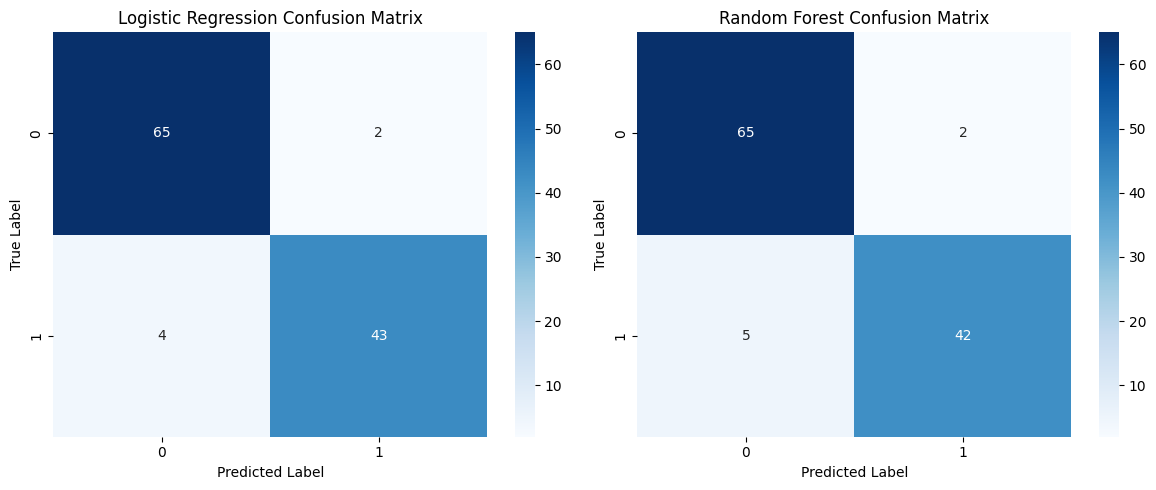

In [21]:
# Create confusion matrix visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Convert confusion matrices to integers to ensure they display correctly
log_cm_int = log_cm.astype(int) # Convert to integer type
rf_cm_int = rf_cm.astype(int) # Convert to integer type

# Logistic Regression confusion matrix
sns.heatmap(log_cm_int, annot=True, fmt='d', cmap='Blues', ax=axes[0]) # Create heatmap
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Random Forest confusion matrix
sns.heatmap(rf_cm_int, annot=True, fmt='d', cmap='Blues', ax=axes[1]) # Create heatmap
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [22]:
# Compare models
models = ['Logistic Regression', 'Random Forest']
metrics = {
    'Accuracy': [log_accuracy, rf_accuracy],
    'Precision': [log_precision, rf_precision],
    'Recall': [log_recall, rf_recall],
    'F1 Score': [log_f1, rf_f1]
}

comparison_df = pd.DataFrame(metrics, index=models) # Create comparison dataframe
comparison_df # Display comparison

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.947368,0.955556,0.914894,0.934783
Random Forest,0.938596,0.954545,0.893617,0.923077
